[<img src='https://vermontcomplexsystems.org/index_files/large-526602.png' width="180" height="150" align="center"/>](https://vermontcomplexsystems.org/)


**CSYS 303:** Complex Networks

**Name:** Patrick L. Harvey

**Date:** 20230228

**Report:** Available on [Overleaf](https://www.overleaf.com/read/jwptqkrxjbkr) or [GitHub](https://github.com/P-Harvey/WebLaTex/blob/a6ff861fc8e49981e7c4deb5417826cbfd124951/CSYS_303_Complex_Networks/assignment20.tex)

****

**Description:** 
This notebook applies [methods](https://arxiv.org/abs/2008.02250) developed by members of the Vermont Complex Systems Center to examine sentiment 
(specifically happiness) for a given text or corpus. 
The specific text examined in this implementation of their methods is Cormac McCarthy's *Blood Meridian* which is freely available as a PDF [here](https://altair.pw/pub/lib/Cormac%20Mccarthy%20-%20The%20Blood%20Meridian.pdf).
Adobe Acrobat Pro was used to convert the PDF document to a plain text (.txt) file.

****

**Index**

[Setup](#Setup)

1. [Imports](#Imports)

2. [Functions](#Functions)

[Assignment 20](#Assignment_20)

1. [Part 1](#Question_1)

$\qquad$ a. [Part 1a](#Part_1a)

$\qquad$ b. [Part 1b](#Part_1b)

$\qquad$ c. [Part 1c](#Part_1c)

$\qquad$ d. [Part 1d](#Part_1d)

$\qquad$ e. [Part 1e](#Part_1e)

$\qquad$ f. [Part 1f](#Part_1f)

4. [Appendices](#Appendices)

  $\qquad$ a. [Citations and References](#Citations_and_References)

****

# Setup
<a id='Setup'></a>

## Imports
<a id='Imports'></a>

In [1]:
""" Run the latest and greatest """
%pip install --upgrade pip
%pip install -r requirements.txt --upgrade

""" Import them all """
import itertools
import json
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
import shifterator as sh
import string
from string import punctuation as punct
import sys

""" Sometimes ignorance = bliss """
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

""" In case Computer Modern Roman size 10 isn't an option. """
# mpl.font_manager.findSystemFonts(fontpaths = None, fontext = 'ttf')

""" Set default font for plots. """
mpl.rc('font',
       family = 'serif',
       serif = 'cmr10')
mpl.rc('mathtext',
       fontset = 'cm')

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Functions
<a id='Functions'></a>

In [2]:
def load_text(f: str = '/content/text.txt',
              prnt: bool = True):
  with open(f) as txt:
    gram_list = re.findall(r"\w+[^\s\.,?!;]+|\w+|[\.,?!;]",
                           ''.join(txt.readlines()))
    if prnt:
      print(f"Total n-grams: {len(np.array(gram_list)):>14,}")
  return np.array(gram_list)

def get_word_freq(f: str = '/content/text.txt',
                  prnt: bool = True):
  n_gram_vec = load_text(f)
  freq = np.array(np.unique(n_gram_vec, return_counts=True, axis=None))
  if prnt:
    print(f'Total unique n-grams: {len(np.array(freq[1])):>7,}')
  return freq, n_gram_vec

def plot_zipf(f: str = '/content/text.txt'):
  freq = load_text(f)
  plt.scatter(x = np.linspace(len(freq),1,len(freq)), 
              y = freq,
              s = 2,
              c = 'k',
              alpha = 0.8,
              linewidths=0.)
  plt.xscale('log')
  plt.yscale('log')
  plt.suptitle('Blood Meridian by Cormac McCarthy',
              fontsize = 16)
  plt.title('Rank-Frequency (Zipf) Plot')
  plt.xlabel(r'log$_{10}$(Rank)')
  plt.ylabel(r'log$_{10}$(Frequency)')
  sns.despine()
  plt.show()

def subdue_ts_df(df, dh):
  return pd.DataFrame([i for i in df if i <= df.mean() - dh or i <= df.mean() + dh]).interpolate(method='linear')

def lens_ts_df(df, w):
   return pd.DataFrame(df.rolling(int(w)).sum() / w).interpolate(method='linear')

def gen_ts_df(source: str = 'Blood_Meridian_McCarthy.txt'):
  ts = np.char.lower(load_text(source, False))
  sentiment_lmt1 = pd.read_table('./dataset_s1.tsv')
  sentiment_lmt1.set_index(sentiment_lmt1['word'], inplace = True)
  ind_list = [sentiment_lmt1.index.get_loc(word) for word in ts if word in sentiment_lmt1.index]
  return sentiment_lmt1.iloc[ind_list]['happiness_average']

def gen_ts_windows(ts_df: pd.core.frame.DataFrame = None,
                   dh: float = 0.,
                   t: list = [10**1, 10**1.5, 10**2, 10**2.5, 10**3, 10**3.5, 10**4],
                   fixed_y: bool = False,
                   show_plot: bool = False,
                   ax = None):
  
  if ax is None:
    fig, axs = plt.subplots(7, 1, figsize = (3.5, 9), dpi = 180)

  else:
    return overplot(ts_df, t, ax, fixed_y)
  
  for i, ax in enumerate(axs):
      temp = ts_df
      temp = lens_ts_df(ts_df, t[i])
      temp.plot(ax = ax,
                alpha = 2/3,
                linewidth = 1/3,
                color='maroon',
                legend = False)
      ax.set_title(r'$\delta_h=0; T=$'+f'{int(t[i])}',
                      fontsize = 7)

      n = len(temp)
      ticks = [int(i) for i in np.linspace(1, n, 6)]
      ax.set_xticks(ticks)
      ax.set_xlabel('')
      if fixed_y:
        ax.set_yticks(np.linspace(3.7, 6.1, 4))
        ax.set_yticklabels(labels = np.linspace(3.7, 6.1, 4),fontsize = 6)

      if i == 6:
          ax.set_xticklabels([], fontsize = 6)
          ax.set_xlabel('Word Index', fontsize = 6)

  if show_plot:
    plt.suptitle('Average Lexical Happiness\nBlood Meridian by Cormac McCarthy (1985)',
                 fontsize = 10)
    plt.tight_layout()
    plt.savefig(fname = f'bm_T{int(t[i])}.jpg')
    plt.show()
  return axs

def overplot(ts_df, t, ax, fixed_y):
  temp = ts_df
  temp = lens_ts_df(ts_df, t)
  temp.plot(ax = ax,
            alpha = 2/3,
            linewidth = 1/3,
            color='maroon',
            legend = False)
  ax.set_title(r'$\delta_h=0; T=$'+f'{int(t)}',
                  fontsize = 7)

  n = len(temp)
  ticks = [int(i) for i in np.linspace(1, n, 6)]
  ax.set_xticks(ticks)
  ax.set_xlabel('')
  if fixed_y:
    ax.set_yticks(np.linspace(3.7, 6.1, 4))
    ax.set_yticklabels(labels = np.linspace(3.7, 6.1, 4),fontsize = 6)
  return ax

def gen_ts_delta_h(ts_df: pd.core.frame.DataFrame = None,
                   dh: list = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5],
                   t: float = 10**3.5,
                   fixed_y: bool = False,
                   show_plot: bool = False,
                   ax = None):
  if ax is None:
    fig, axs = plt.subplots(7, 1, figsize = (3.5, 9), dpi = 180)
  else:
    for i in dh:
      temp = ts_df
      temp = subdue_ts_df(ts_df, i)
      temp = lens_ts_df(ts_df, t)
      ax.plot(np.linspace(0, len(ts_df), len(temp)),
              temp.values,
              alpha = 2/3,
              linewidth = 1/3)
    return ax
  for i, ax in enumerate(axs):
      temp = subdue_ts_df(ts_df, dh[i])
      temp = lens_ts_df(temp, t)
      temp.plot(ax = ax,
                alpha = 2/3,
                linewidth = 1/3,
                color='maroon',
                legend = False)
      ax.set_title(r'$\delta_h=$'+f'{dh[i]}; '+r'$T=$'+f'{int(t)}',
                   fontsize = 7)
      
      n = len(temp)
      ticks = [int(i) for i in np.linspace(1, n, 6)]
      ax.set_xticks(ticks)
      if fixed_y:
        ax.set_yticks([5.2,5.3,5.4])
        ax.set_yticklabels(labels = [5.2,5.3,5.4],fontsize = 6)

      if i != 3.5:
          ax.set_xticklabels([], fontsize = 6)

  if show_plot:
    plt.suptitle('Average Lexical Happiness\nBlood Meridian by Cormac McCarthy (1985)',
                 fontsize = 10)
    plt.tight_layout()
    plt.savefig(fname = f'bm_T{int(t[i])}.jpg')
    plt.show()
  return axs

def stacked_plot(ts_df, t, show_plot = False):
    re_df = pd.DataFrame()
    dh = np.arange(0.5,4,0.5)
    for i in dh:
        temp = subdue_ts_df(ts_df, i)
        temp = lens_ts_df(temp, t)
        re_df = pd.concat(
           (re_df, temp.rename(columns={0:i})),
           axis=1,
           ignore_index=True,
           keys=list(re_df.columns).append(i),
           names=['delta_h', None])
    if show_plot:
        fig, ax = plt.subplots(
            1,1,
            sharey=True,
            figsize=(7.5, 3.5),
            dpi=180)
        re_df.interpolate(method='linear').plot(
            ax=ax,
            alpha=0.8,
            linewidth=0.5,
            colormap='gnuplot',
            marker='.')
        fig.show()
    return re_df

def gen_shift_args(wf_1 : dict = None,
                   wf_2 : dict = None,
                   raise_err : bool = False,
                   prop_shift : bool = False,
                   set_ref : bool = False,
                   lens : list = [(3,7)]):
    
    if raise_err or prop_shift:
        raise_err = 'error'
        types = set(wf_1.keys()).union(wf_2.keys())
        for t in types:
            if t not in wf_1:
                wf_1[t] = 0
            elif t not in wf_2:
                wf_2[t] = 0

    else:
       raise_err = 'exclude'

    if set_ref:
       ref = np.mean(subdue_ts_df(gen_ts_df(), lens[0][0]-lens[0][1]))[0]

    else:
       ref = 0

    print("Lensing Window: [{}, {}]".format(lens[0][0], lens[0][1]))
    print("Reference Happiness: {:4.3f}".format(ref))

    wa_args = { 
        'type2freq_1' : wf_1,
        'type2freq_2' : wf_2,
        'type2score_1' :  'labMT_English',
        'type2score_2' : 'labMT_English',
        'reference_value' : ref,
        'handle_missing_scores' : raise_err,
        'stop_lens' : lens,
        'stop_words' : None,
        'normalization' : "variation"
    }

    ps_args = {
        'type2freq_1' : wf_1,
        'type2freq_2' : wf_2,
        'type2score_1' :  'labMT_English',
        'type2score_2' : 'labMT_English',
        'reference_value' : ref,
        'handle_missing_scores' : raise_err,
        'stop_lens' : lens,
        'stop_words' : None,
        'normalization' : "variation"
    }

    en_args = {
        'type2freq_1' : wf_1,
        'type2freq_2' : wf_2,
        'base' : 2,
        'alpha' : 1,
        'reference_value' : ref,
        'normalization' : "variation",
    }

    kl_args = {
        'type2freq_1' : wf_1,
        'type2freq_2' : wf_2,
        'base' : 2,
        'reference_value' : ref,
        'normalization' : "variation",
    }

    js_args = {
        'type2freq_1' : wf_1,
        'type2freq_2' : wf_2,
        'base' : 2,
        'weight_1' : 0.5,
        'weight_2' : 0.5,
        'alpha' : 1,
        'reference_value' : ref,
        'normalization' : "variation",
    }

    return {'weighted_average' : wa_args,
            'proportion_shift' : ps_args, 
            'entropy_shift' : en_args, 
            'kl_shift' : kl_args, 
            'jsd_shift' : js_args}

##########################################################################################
#                                     TEST  FUNCTIONS                                    #
##########################################################################################

def test_plot(ts_df: pd.core.frame.DataFrame = None):
  fig, ax = plt.subplots(1,1,figsize=(20,5),dpi=250)
  ts_df.plot(linewidth=0.05, alpha = 0.95, ax = ax)
  ax.set_xticklabels([int(i) for i in np.linspace(1,len(ts_df), 8)])
  plt.show()

def test_str(n_gram: np.ndarray = None,
             prnt: bool = True):
  test_str = ' '.join(n_gram)
  if prnt:
    print(test_str)
  elif test_str:
    print("Non-zero string created.")
  else:
    print('You probably messed up. Try again!')

def test_window(df):
    return df.applymap(lambda x: df.rolling(int(x).sum())/x)

def test_lens(df, dh):
    return df.applymap(lambda x: x if df[x] >= df.mean() - dh and df[x] <= df.mean() + dh else np.nan)

##########################################################################################
#                                                                                        #
##########################################################################################

# Assignment 20
<a id='Assignment_20'></a>

In [3]:
bm_txt: str = 'Blood_Meridian_McCarthy.txt'
rd_txt: str = 'The_Road_McCarthy.txt'

print('Blood Meridian:')
bm_wf, bm_ng = get_word_freq(bm_txt)
bm_ts_df = gen_ts_df(bm_txt)

print('\nThe Road:')
rd_wf, rd_ng = get_word_freq(rd_txt)
rd_ts_df = gen_ts_df(rd_txt)

bm_wf_dict = {i[0] : int(i[1]) for i in zip(bm_wf[0,:], bm_wf[1,:])}
rd_wf_dict = {i[0] : int(i[1]) for i in zip(rd_wf[0,:], rd_wf[1,:])}

Blood Meridian:
Total n-grams:        126,105
Total unique n-grams:  11,302

The Road:
Total n-grams:         34,132
Total unique n-grams:   3,839


## Question 1
<a id='Question_1'></a>

****

Using your text of choice,
generate word shifts comparing two "interesting" regions of text.

Use the Python package described [here](https://github.com/ryanjgallagher/shifterator).

Various MATLAB versions made by REDACTED do exist and need to shared.

Links to paper versions (arXiv is always best), 
Github repository,
and an exhilarating Twitter feed can be found [here](https://pdodds.w3.uvm.edu/research/papers/gallagher2021a/).

"Interesting" is anything you find interesting.

Could be books 3 and 12 in a series;
the second half of a book compared to the first half;
season 4 of a show versus all seasons;
etc.

Aim to find two texts that are both reasonably large (more than $10^{4}$ words)
and fairly different in average happiness scores.

(Though even the same scores can be meaningfully explored with word shifts)

Let's call the two texts
$T^{(1)}$
and
$T^{(2)}$.

In your plots, you should label them meaningfully based on your choices).

Use a reasonable exclusion lens of your choice, e.g., $[4, 6]$ or $[3, 7]$.

****


### Part a.
<a id='Part_2a'></a>

****

Produce a word shift comparing text $T^{(2)}$ relative to text $T^{(1)}$.
Use the average happiness of text $T^{(1)}$ as the baseline.

****

Lensing Window: [4, 6]
Reference Happiness: 5.243


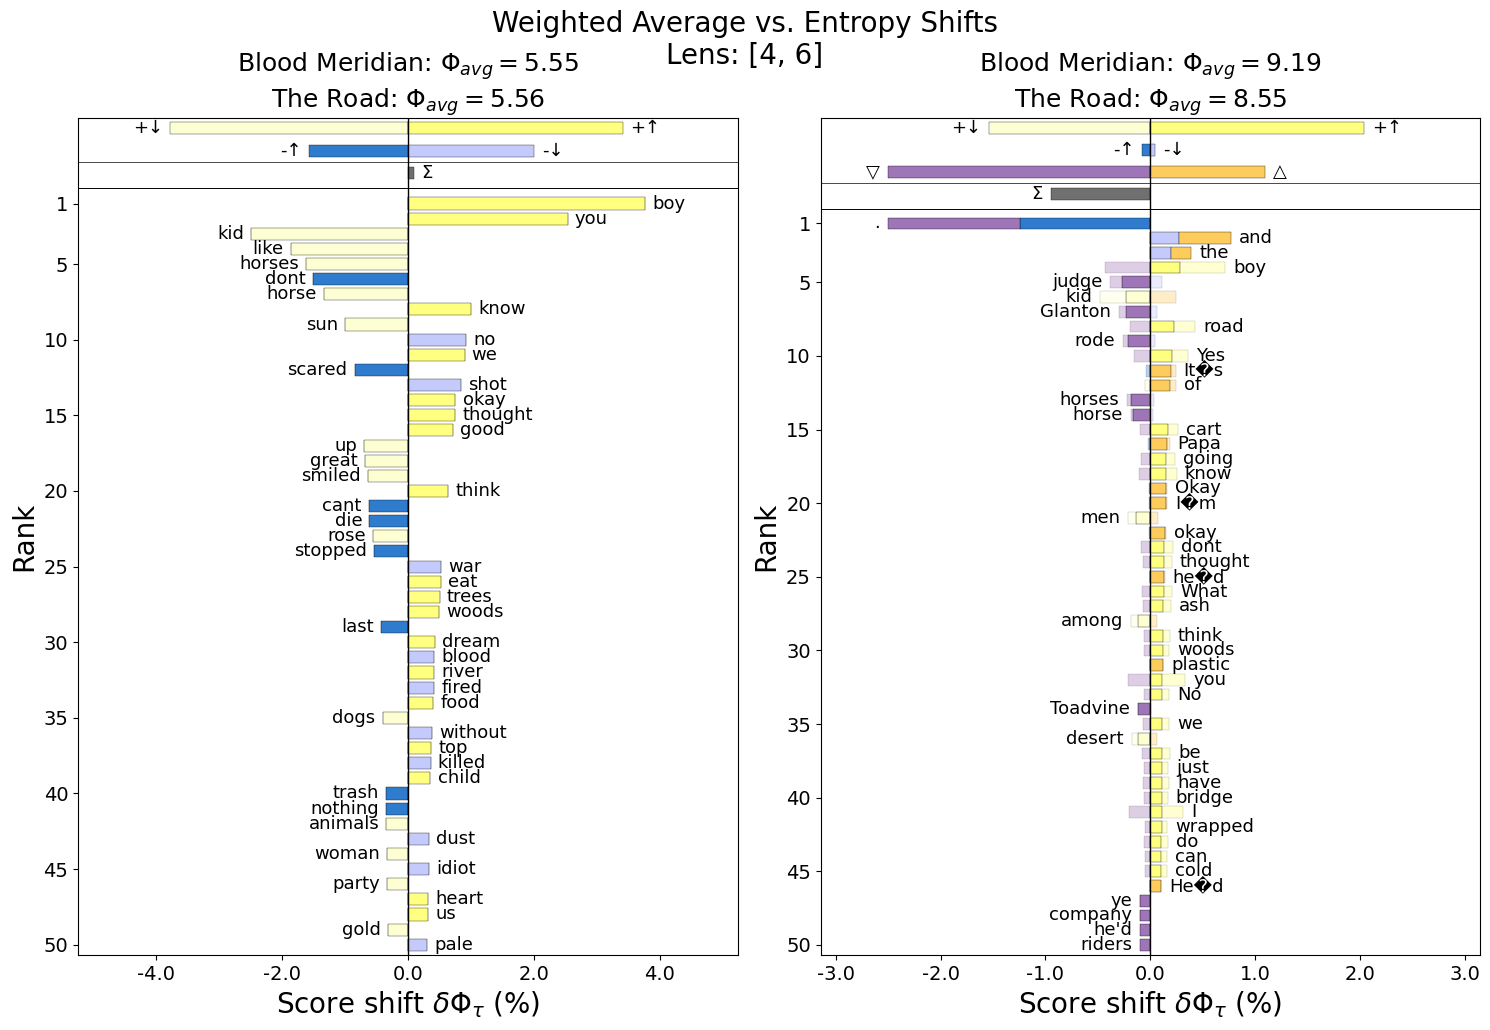

In [4]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

args = gen_shift_args(
    bm_wf_dict, 
    rd_wf_dict,
    set_ref = True,
    lens=[(4,6)]
)

fig = plt.figure(1, figsize = (15,10), layout = 'tight')

sent_shift_was = sh.WeightedAvgShift(**args['weighted_average'])

sent_shift_ent = sh.EntropyShift(**args['entropy_shift'])

ax1 = fig.add_subplot(121)
sent_shift_was.get_shift_graph(
    ax = ax1,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    system_names = ['Blood Meridian', 'The Road'])

ax2 = fig.add_subplot(122)
sent_shift_ent.get_shift_graph(
    ax = ax2,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    system_names = ['Blood Meridian', 'The Road'])

fig.suptitle('Weighted Average vs. Entropy Shifts\nLens: [4, 6]', 
             fontsize = 20,
             x = 0.5,
             y = 1.025)
plt.show()

Lensing Window: [3, 7]
Reference Happiness: 5.266


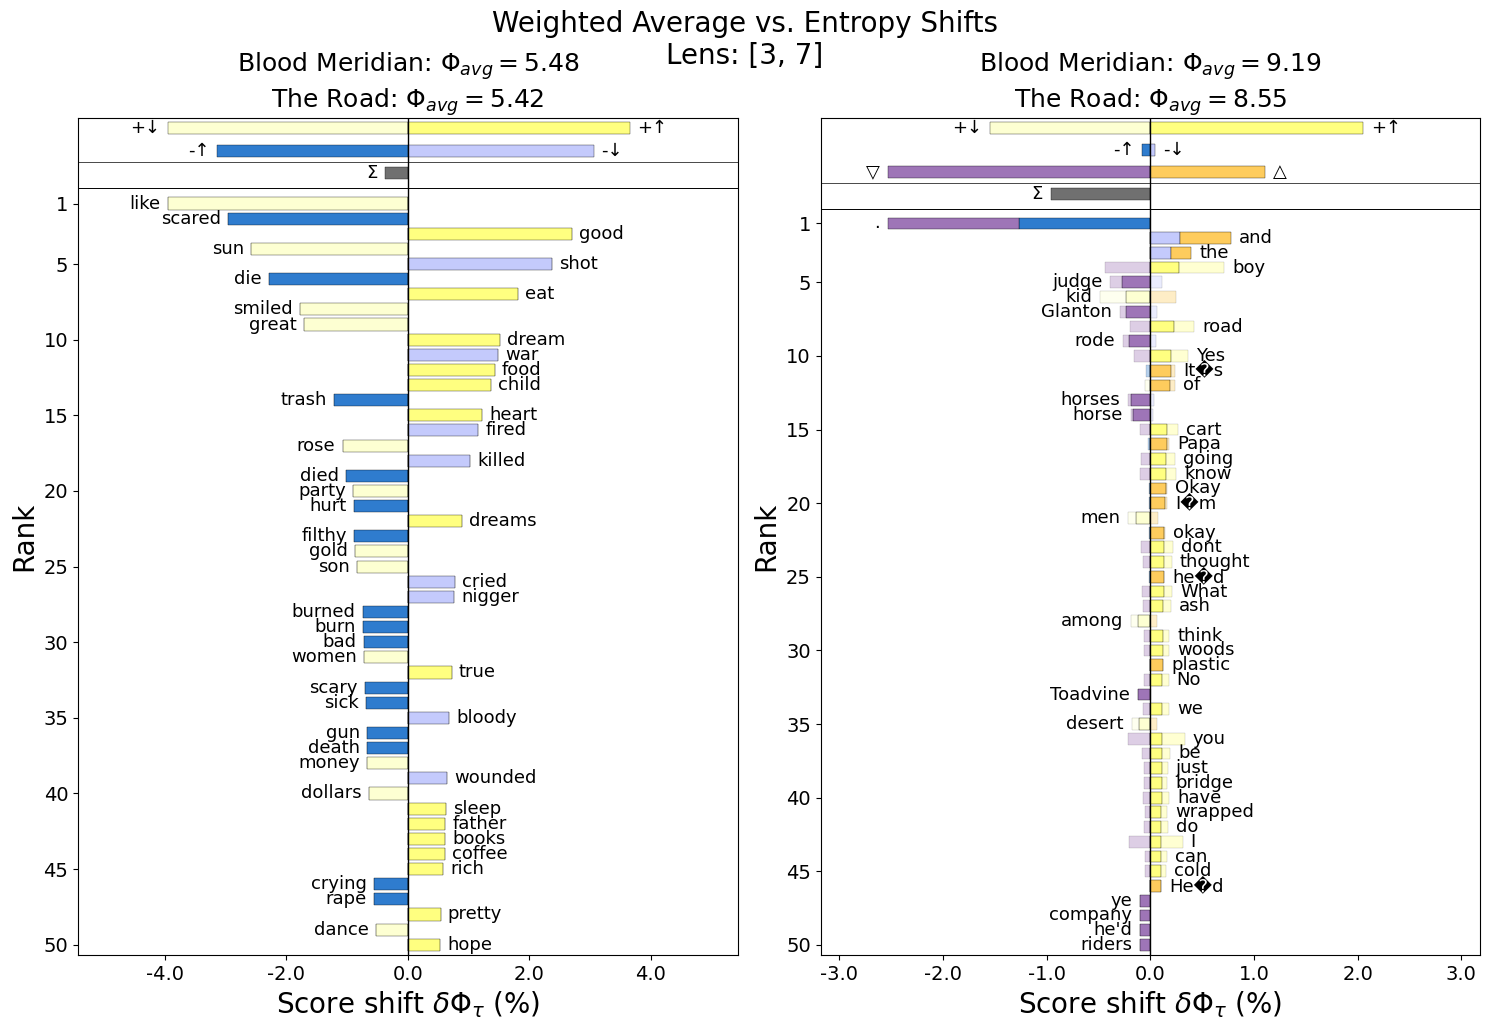

In [5]:
fig = plt.figure(1, figsize = (15,10), layout = 'tight')

args = gen_shift_args(
    bm_wf_dict, 
    rd_wf_dict,
    set_ref = True,
    lens=[(3,7)]
)

sent_shift_was = sh.WeightedAvgShift(**args['weighted_average'])

sent_shift_ent = sh.EntropyShift(**args['entropy_shift'])

ax1 = fig.add_subplot(121)
sent_shift_was.get_shift_graph(
    ax = ax1,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    system_names = ['Blood Meridian', 'The Road'])

ax2 = fig.add_subplot(122)
sent_shift_ent.get_shift_graph(
    ax = ax2,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    system_names = ['Blood Meridian', 'The Road'])

fig.suptitle('Weighted Average vs. Entropy Shifts\nLens: [3, 7]', 
             fontsize = 20,
             x = 0.5,
             y = 1.025)
plt.show()

Lensing Window: [3, 7]
Reference Happiness: 5.266


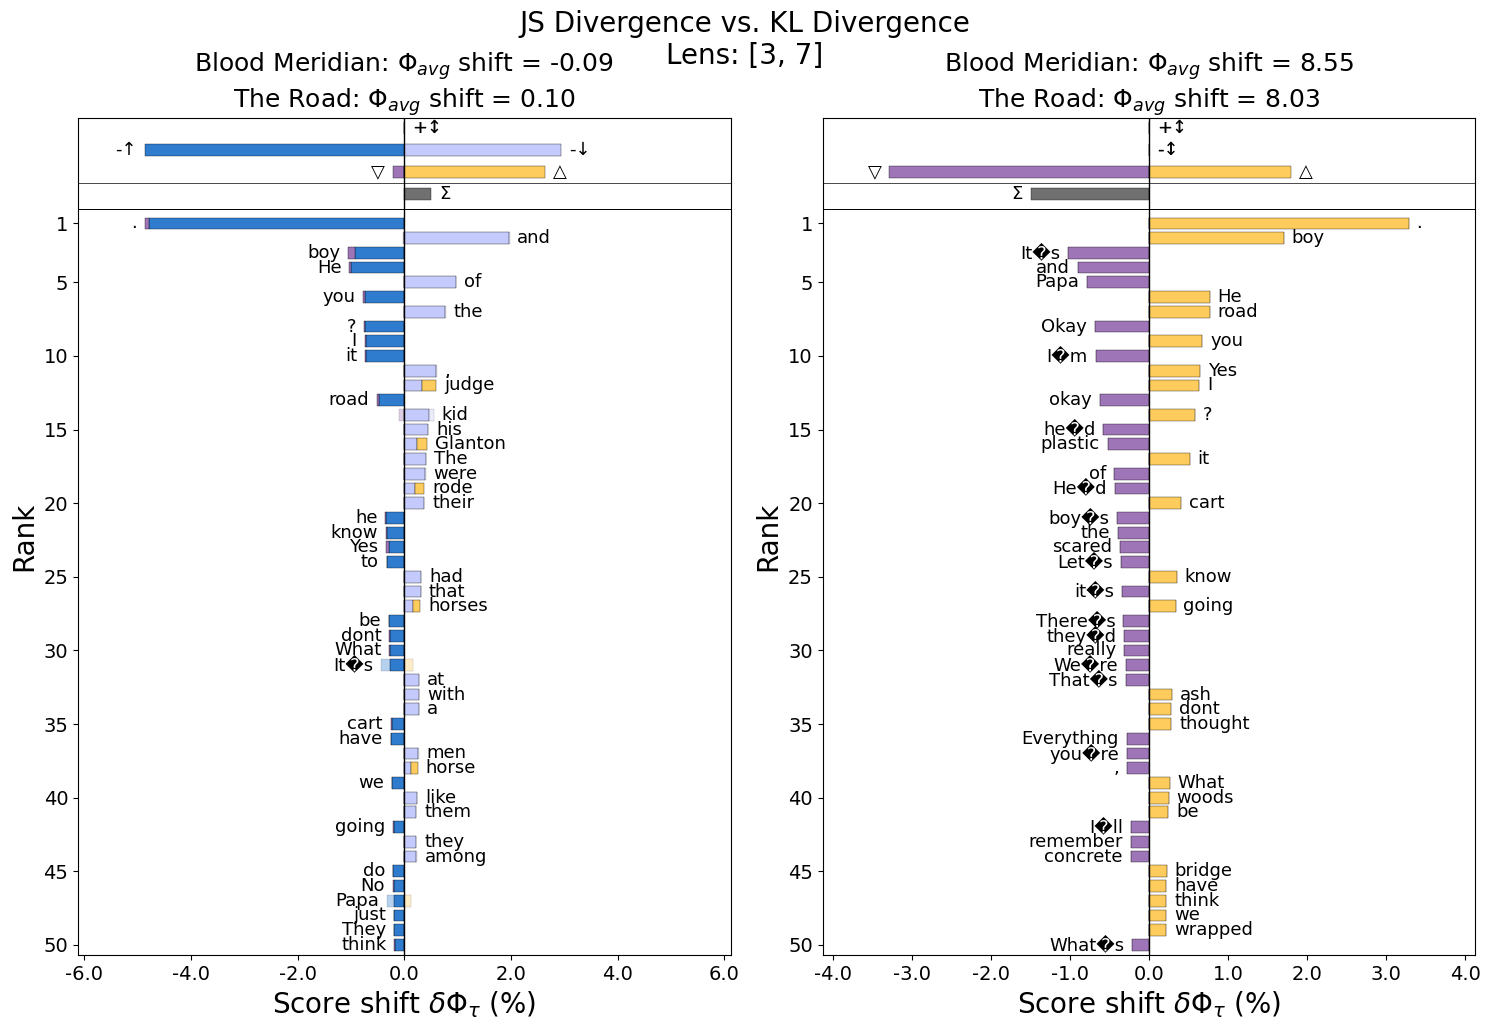

In [6]:
fig = plt.figure(1, figsize = (15,10), layout = 'tight')
system_names = ['Blood Meridian', 'The Road']

args = gen_shift_args(
    bm_wf_dict, 
    rd_wf_dict,
    set_ref = True,
    prop_shift = True,
    lens=[(3,7)]
)

sent_shift_jsd = sh.JSDivergenceShift(**args['jsd_shift'])

sent_shift_kld = sh.KLDivergenceShift(**args['kl_shift'])

ax1 = fig.add_subplot(121)
s_avg_1 = sent_shift_jsd.get_weighted_score(sent_shift_jsd.type2freq_1, sent_shift_jsd.type2score_1)
s_avg_2 = sent_shift_jsd.get_weighted_score(sent_shift_jsd.type2freq_2, sent_shift_jsd.type2score_2)
title = (
    "{}: ".format(system_names[0])
    + r"$\Phi_{avg}$"
    + " shift = {0:.2f}".format(s_avg_1)
    + "\n"
    + "{}: ".format(system_names[1])
    + r"$\Phi_{avg}$"
    + " shift = {0:.2f}".format(s_avg_2)
)
sent_shift_jsd.get_shift_graph(
    ax = ax1,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    title = title)

ax2 = fig.add_subplot(122)
s_avg_1 = sent_shift_kld.get_weighted_score(sent_shift_kld.type2freq_1, sent_shift_kld.type2score_1)
s_avg_2 = sent_shift_kld.get_weighted_score(sent_shift_kld.type2freq_2, sent_shift_kld.type2score_2)
title = (
    "{}: ".format(system_names[0])
    + r"$\Phi_{avg}$"
    + " shift = {0:.2f}".format(s_avg_1)
    + "\n"
    + "{}: ".format(system_names[1])
    + r"$\Phi_{avg}$"
    + " shift = {0:.2f}".format(s_avg_2)
)
sent_shift_kld.get_shift_graph(
    ax = ax2,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    title = title)

fig.suptitle('JS Divergence vs. KL Divergence\nLens: [3, 7]', 
             fontsize = 20,
             x = 0.5,
             y = 1.025)
plt.show()

### Part b.
<a id='Part_2b'></a>

****

Interpret the word shift. Does what you see make sense?
Are there any surprises?
Are some words being used in what the average person might not think is their primary meaning?
For example, "crying" in Moby Dick means yelling, and "sick" can mean "awesome."

****

The results here make sense with respect to McCarthy's diction.
It is important to note, however, that words which may generally have a "happy" connotation do not in the context of these works.

For example, "party", "gold", "money", "dollars", and "dance" are often used in the context of a party of bandits, dancing over a slain person, or the seizing of material objects.

The sentiment assigned to "like" is inappropriate in terms of McCarthy's diction, as it is often used to portray a simile. It would be nice if there were things in the novel which were objectively likeable, however it is like you are looking through a window where native peoples are beheaded for dollars. Needless to say, there is not much like the unflinching violence portrayed in $T^{(1)}$

The only surprise, for me at least, is that $T^{(1)}$ is more gruesome than I remembered. While $T^{(2)}$ does not spare any details with respect to the brutality of life, there is a sense of hope portrayed by the author which is made evident in these comparisons.

We see how narrowing the lens from $\pm 2$ to $\pm 1$

### Part c.
<a id='Part_2c'></a>

****

Produce a word shift comparing text $T^{(1)}$ relative to text $T^{(2)}$.
Use the average happiness of text $T^{(2)}$ as the baseline.

****

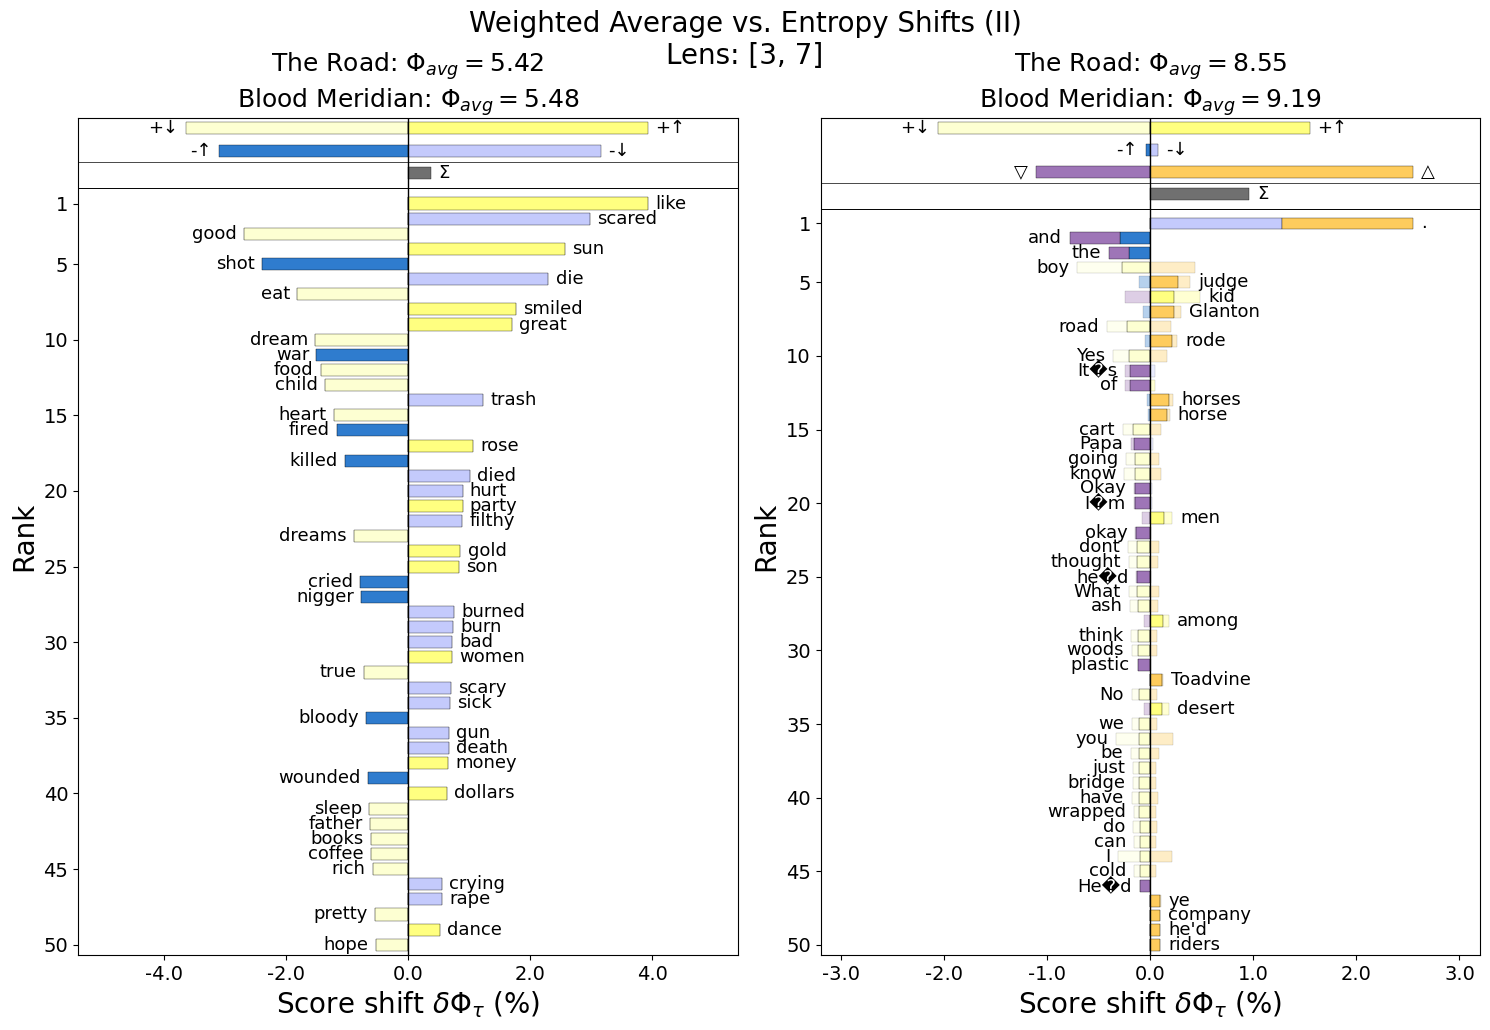

In [7]:
fig = plt.figure(1, figsize = (15,10), layout = 'tight')

textb_ref = np.mean(subdue_ts_df(gen_ts_df('The_Road_McCarthy.txt'), 2))[0]

args['weighted_average']['reference_value'] = textb_ref
args['entropy_shift']['reference_value'] = textb_ref

args['weighted_average']['type2freq_1'] = rd_wf_dict
args['weighted_average']['type2freq_2'] = bm_wf_dict

args['entropy_shift']['type2freq_1'] = rd_wf_dict
args['entropy_shift']['type2freq_2'] = bm_wf_dict

sent_shift_was = sh.WeightedAvgShift(**args['weighted_average'])

sent_shift_ent = sh.EntropyShift(**args['entropy_shift'])

ax1 = fig.add_subplot(121)
sent_shift_was.get_shift_graph(
    ax = ax1,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    system_names = ['The Road', 'Blood Meridian'])

ax2 = fig.add_subplot(122)
sent_shift_ent.get_shift_graph(
    ax = ax2,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    system_names = ['The Road', 'Blood Meridian'])

fig.suptitle('Weighted Average vs. Entropy Shifts (II)\nLens: [3, 7]', 
             fontsize = 20,
             x = 0.5,
             y = 1.025)
plt.show()

### Part d.
<a id='Part_2d'></a>

****

Comment on any asymmetries you see (the basic word shifts we use are asymmetric).

****

Let's start with the less than happy words identified for each.

$T^{(2)}$ has 10 of the 18 negative words within the top 50 contributing words for weighted average shift.

The frequency of "boy" and "you" in $T^{(2)}$ appears significantly greater than "kid", "like", etc. in $T^{(2)}$, leading to the apparent disproportionate frequency distributions.

### Part e.
<a id='Part_2e'></a>

****

Produce a word shift comparing text $T^{(1)}$ relative to text $T^{(2)}$. 
Now use 5 as the baseline reference score (neutral on the happiness-sadness spectrum of 1 $-$ 9).

****

Lensing Window: [3, 7]
Reference Happiness: 5.266


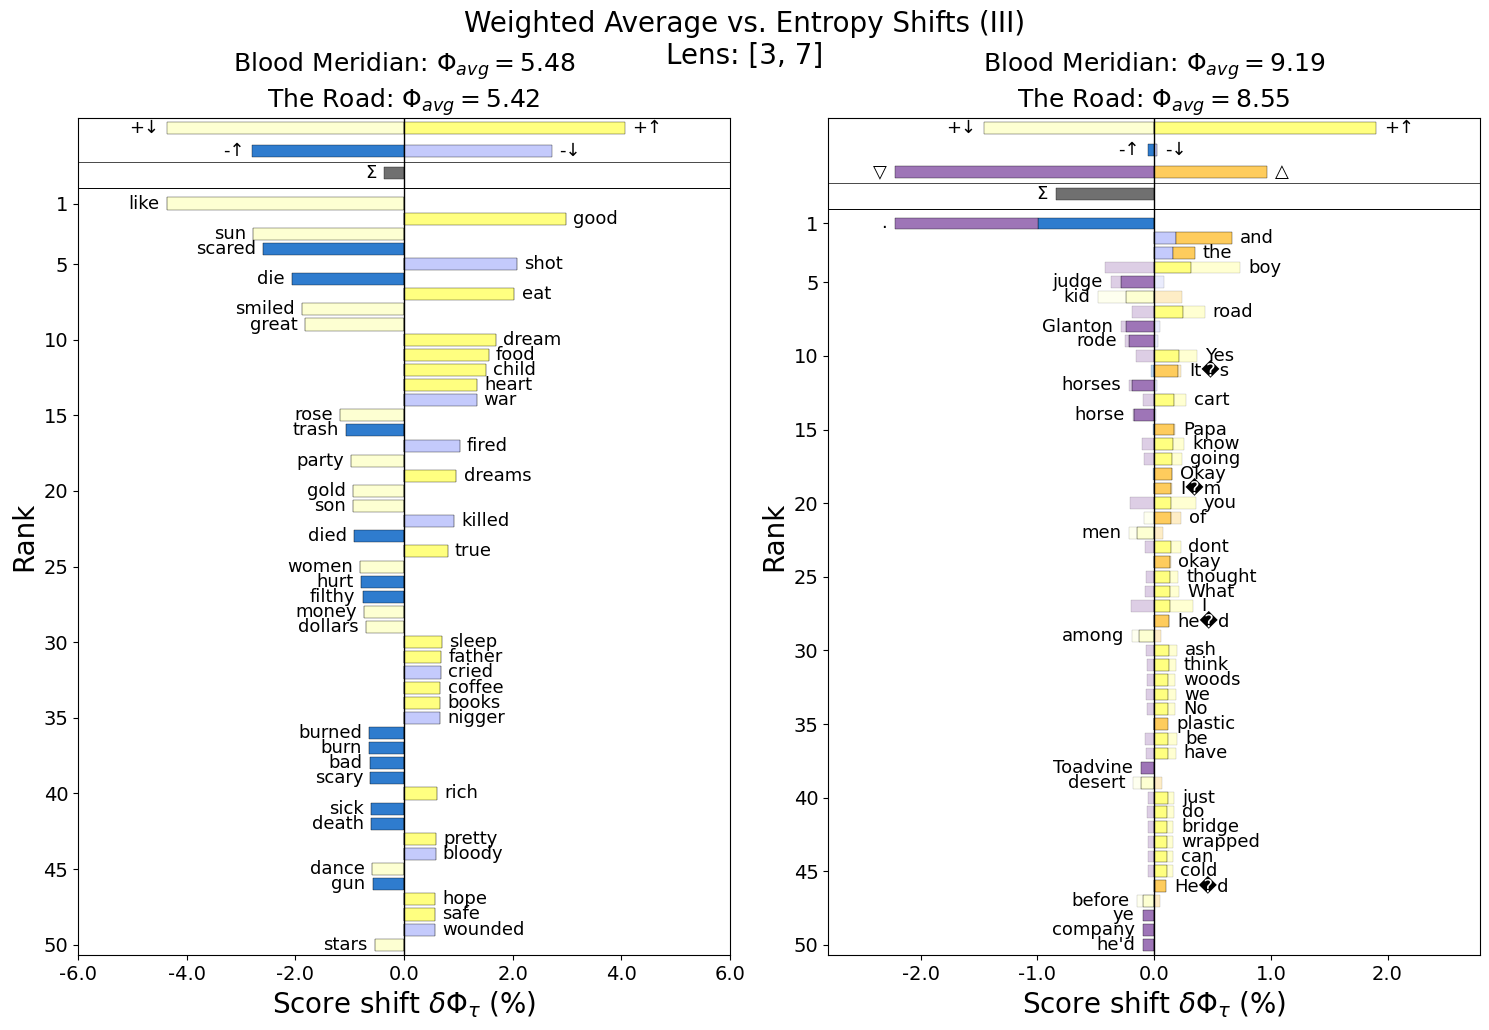

In [8]:
fig = plt.figure(1, figsize = (15,10), layout = 'tight')

args = gen_shift_args(
    bm_wf_dict, 
    rd_wf_dict,
    set_ref = True,
    prop_shift = True,
    lens=[(3,7)]
)

args['weighted_average']['reference_value'] = 5
args['entropy_shift']['reference_value'] = 5

sent_shift_was = sh.WeightedAvgShift(**args['weighted_average'])

sent_shift_ent = sh.EntropyShift(**args['entropy_shift'])

ax1 = fig.add_subplot(121)
sent_shift_was.get_shift_graph(
    ax = ax1,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    system_names = ['Blood Meridian', 'The Road'])

ax2 = fig.add_subplot(122)
sent_shift_ent.get_shift_graph(
    ax = ax2,
    detailed = True,
    show_plot = False,
    text_size_inset = False,
    cumulative_inset = False,
    system_names = ['Blood Meridian', 'The Road'])

fig.suptitle('Weighted Average vs. Entropy Shifts (III)\nLens: [3, 7]', 
             fontsize = 20,
             x = 0.5,
             y = 1.025)
plt.show()

### Part f.
<a id='Part_2f'></a>

**** 

Compared to your first word shift, how interpretable is this one?

****

# Appendices
<a id='Appendices'></a>

## Citations and References
<a id='Citations_and_References'></a>

```
@article{10.1371/journal.pone.0026752,
    doi = {10.1371/journal.pone.0026752},
    author = {
      Dodds, Peter Sheridan 
      AND Harris, Kameron Decker 
      AND Kloumann, Isabel M. 
      AND Bliss, Catherine A. 
      AND Danforth, Christopher M.
    },
    journal = {PLOS ONE},
    publisher = {Public Library of Science},
    title = {
      Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter
    },
    year = {2011},
    month = {12},
    volume = {6},
    url = {https://doi.org/10.1371/journal.pone.0026752},
    pages = {1-1},
    abstract = {
      Individual happiness is a fundamental societal metric.
      Normally measured through self-report, happiness has often 
      been indirectly characterized and overshadowed by more 
      readily quantifiable economic indicators such as gross 
      domestic product. Here, we examine expressions made on the 
      online, global microblog and social networking service 
      Twitter, uncovering and explaining temporal variations in 
      happiness and information levels over timescales ranging 
      from hours to years. Our data set comprises over 46 billion 
      words contained in nearly 4.6 billion expressions posted 
      over a 33 month span by over 63 million unique users. 
      In measuring happiness, we construct a tunable, real-time, 
      remote-sensing, and non-invasive, text-based hedonometer. 
      In building our metric, made available with this paper, 
      we conducted a survey to obtain happiness evaluations of 
      over 10,000 individual words, representing a tenfold size 
      improvement over similar existing word sets. Rather than 
      being ad hoc, our word list is chosen solely by frequency 
      of usage, and we show how a highly robust and tunable 
      metric can be constructed and defended.
    },
    number = {12}
}

@Misc{dodds2014a,
  author = {
    Dodds, P. S.
    and Clark, E. M.
    and Desu, S.
    and Frank, M. R.
    and Reagan, A. J.
    and  Williams, J. R.
    and Mitchell, L.
    and Harris, K. D.
    and Kloumann, I. M.
    and Bagrow, J. P.
    and Megerdoomian, K.
    and McMahon, M. T.
    and Tivnan, B. F.
    and Danforth, C. M.
  },
  title = {
    Human language reveals a universal positivity bias
  },
  OPThowpublished = {},
  OPTmonth = 	 {},
  year = {
    2014
  },
  note = 
  {
    Preprint available at
    \href{http://arxiv.org/abs/1406.3855}{http://arxiv.org/abs/1406.3855}
  },
  OPTannote = 	 {}
}

@Article{gallagher2021a,
  author =	 {
    Gallagher, Ryan J. 
    and Frank, Morgan R. 
    and Mitchell, Lewis 
    and Schwartz, Aaron J. 
    and Reagan, Andrew J. 
    and Danforth, Christopher M. 
    and Dodds, Peter Sheridan
  },
  title =	 {
    Generalized word shift graphs: 
    A method for visualizing and 
    explaining pairwise comparisons between texts
  },
  journal =	 {EPJ Data Science},
  year =	 {2021},
  key =	 {
    systems,
    text,
    words,
    divergences,
    entropy,
    language
  },
  volume =	 {10},
  pages =	 {4},
  note =	 {
    Available online at 
    \href{https://arxiv.org/abs/2008.02250}{https://arxiv.org/abs/2008.02250}
  },
}
```












In [ ]:
import os
import sys
import datetime
import subprocess
import pandas as pd
import argparse
from dateutil.relativedelta import relativedelta   


def date_exists(date, pth="../../data/tmp/", lang='en'):
    """ ensure 1gram rank file in the right place """
    datestr = date.strftime(format='%Y-%m-%d')
    thayer_pth = '/users/t/a/talshaab/scratch/storywrangler/storyons/1grams/'
    
    if not os.path.isfile(pth+datestr+'.tsv'):
        if os.path.isfile(thayer_pth+datestr+'.tar.gz'):
            subprocess.call(['bash','/users/m/v/mvarnold/matlab/allotaxonometer/figures/storywrangler/unpack_tar.sh', datestr, lang])
        else:
            print('File does not exist',date)
            raise OSError

def figure_exists(date,date2, pth="figallotaxonometer9000"):
    """quit if figure already exists """
    fig_name = f'figallotaxonometer9000-{date.strftime(format="%Y-%m-%d")}-{date2.strftime(format="%Y-%m-%d")}-rank-div-alpha-third_noname.pdf'
    if os.path.isfile(pth+fig_name):
        raise OSError    


def make_rank_divergence(date1, date2):
    """ make a rank divergence plots between two days on twitter

    :param date1: old date
    :param date2: new date
    """

    print(os.getcwd()) 
    # make sure files exist
    date1 = datetime.datetime.strptime(date1,'%Y-%m-%d')
    date2 = datetime.datetime.strptime(date2,'%Y-%m-%d')
    try:
        figure_exists(date1,date2)
        date_exists(date1)
        date_exists(date2)

        # call matlab script
        datestr1 = date1.strftime(format='%Y %m %d')
        datestr2 = date2.strftime(format='%Y %m %d')
        subprocess.call(['/gpfs1/arch/x86_64-rhel7/matlab2017b/bin/matlab',
            '-nodesktop',
            '-nosplash',
            '-r',
            f"cd('/users/patrick/matlab/allotaxonometer/figures/storywrangler'); figtwitter([{datestr1}],[{datestr2}]); exit"],
            cwd='/users/patrick/matlab/allotaxonometer/figures/storywrangler')
    except OSError:
        pass

def parse_args():

    parser = argparse.ArgumentParser(description="run rank divergence plots")
    parser.add_argument('--date1', type=str)
    parser.add_argument('--date2', type=str)
    return parser.parse_args()

args = parse_args()
make_rank_divergence(args.date1, args.date2)